In [17]:
       #project title: Customer Churn Prediction Using Machine Learning 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [18]:
df = pd.read_csv("Telco-Customer-Churn.zip")

print("First 5 rows:")
df.head()


First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df.isnull().sum()


C:\Users\K SANJAY KUMAR\AppData\Local\Temp\ipykernel_17268\2433902089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

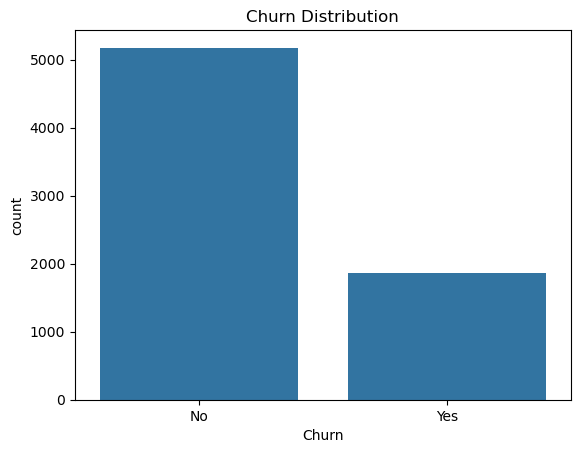

In [21]:
plt.figure()
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


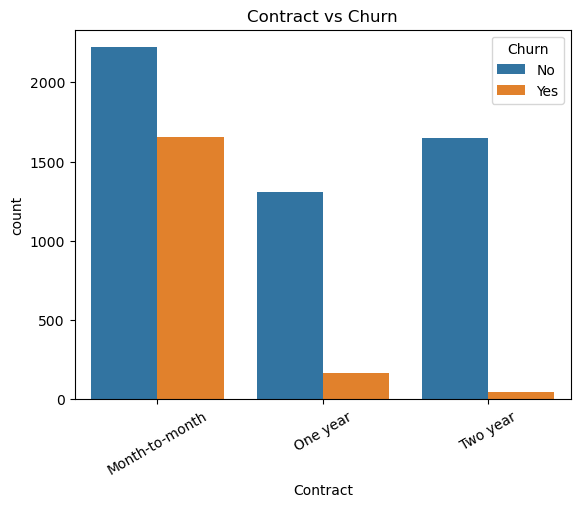

In [22]:
plt.figure()
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=30)
plt.title("Contract vs Churn")
plt.show()


In [23]:
df.drop('customerID', axis=1, inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print(X.shape, y.shape)


(7043, 19) (7043,)


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [27]:
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr.predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Logistic Regression Accuracy: 0.815471965933286
Decision Tree Accuracy: 0.7310149041873669
Random Forest Accuracy: 0.7970191625266146


In [29]:
print(classification_report(y_test, rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



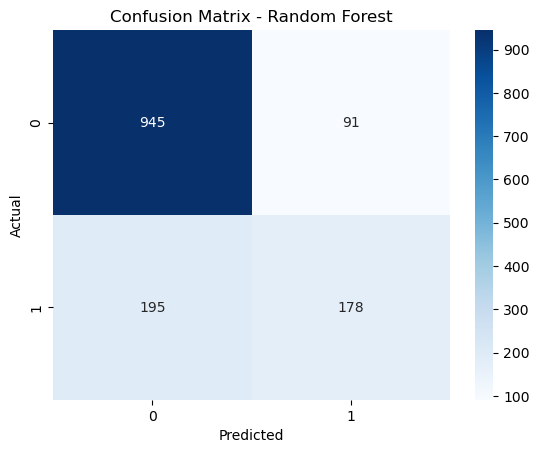

In [30]:
cm = confusion_matrix(y_test, rf.predict(X_test))

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [31]:
print("Model expects features:", X.shape[1])


Model expects features: 19


In [32]:
print("Enter customer details (use numbers only):")

user_data = {}

for col in X.columns:
    user_data[col] = float(input(f"Enter {col} (number): "))

new_customer = pd.DataFrame([user_data])
new_customer_scaled = scaler.transform(new_customer)
prediction = rf.predict(new_customer_scaled)

if prediction[0] == 1:
    print("🔴 Customer Will Churn")
else:
    print("🟢 Customer Will Stay")


Enter customer details (use numbers only):


Enter gender (number):  0
Enter SeniorCitizen (number):  0
Enter Partner (number):  0
Enter Dependents (number):  0
Enter tenure (number):  0
Enter PhoneService (number):  0
Enter MultipleLines (number):  0
Enter InternetService (number):  0
Enter OnlineSecurity (number):  0
Enter OnlineBackup (number):  0
Enter DeviceProtection (number):  0
Enter TechSupport (number):  0
Enter StreamingTV (number):  0
Enter StreamingMovies (number):  0
Enter Contract (number):  0
Enter PaperlessBilling (number):  0
Enter PaymentMethod (number):  0
Enter MonthlyCharges (number):  0
Enter TotalCharges (number):  0


🟢 Customer Will Stay
